In [2]:
##Integrantes:
# Daniela hernandez Uribe
# Juan Jose Gomez
# Diana Patricia Segura


#importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
#1. Cargar el dataset desde un archivo Excel (Dataset_Clientes_Colombia.xlsx)
df_dataset = pd.read_excel("/content/Dataset_Clientes_Colombia (1).xlsx")
df_dataset #muestra los datos

,ID Compra,Nombre,Apellido,Electrodoméstico,Cantidad,Valor Unitario,Valor Total,Fecha Compra,Hora Compra
0,CL-00001,Marcia,PARRA,Nevera,5.0,1800000,9000000,2023-07-12,03:27:54
1,CL-00002,Alfonso,ROMA,Plancha,1.0,150000,150000,2023-01-16,04:34:05
2,CL-00003,NaN,DUE%AS,Horno eléctrico,3.0,500000,1500000,2022-09-21,20:18:45
3,CL-00004,Gonzalo,SEBASTIÁN,Licuadora,3.0,250000,750000,2024-05-23,15:39:00
4,CL-00005,Ambrosio,PRAT,Lavadora,5.0,1500000,7500000,2022-09-08,13:57:58
...,...,...,...,...,...,...,...,...,...
11270,CL-11271,Eusebia,BÁRCENA,Aspiradora,1.0,600000,600000,2024-04-02,21:34:06
11271,CL-11272,Trini,GALLO,Microondas,3.0,400000,1200000,2023-08-29,01:20:59
11272,CL-11273,Bautista,VILLAVERDE,Lavadora,5.0,1500000,7500000,2024-03-04,05:50:19
11273,CL-11274,Jordana,CABRERA,Cafetera,5.0,300000,1500000,2022-05-26,21:24:03


In [6]:
#2. muestra los valores nulos por columna
df_dataset.isnull().sum()

,0
ID Compra,0
Nombre,21
Apellido,20
Electrodoméstico,21
Cantidad,10
Valor Unitario,0
Valor Total,0
Fecha Compra,0
Hora Compra,0


In [7]:
#2. muestra la cantidad de datos faltantes por columna
df_dataset.isna().sum()

,0
ID Compra,0
Nombre,21
Apellido,20
Electrodoméstico,21
Cantidad,10
Valor Unitario,0
Valor Total,0
Fecha Compra,0
Hora Compra,0


In [8]:
#2. Contar valores vacíos (strings vacíos) por columna
empty_counts = (df_dataset == '').sum()
print(empty_counts)

ID Compra           0
Nombre              0
Apellido            0
Electrodoméstico    0
Cantidad            0
Valor Unitario      0
Valor Total         0
Fecha Compra        0
Hora Compra         0
dtype: int64


In [9]:
#2. contar Valores vacíos (strings vacíos) Total
empty_count = (df_dataset == '').sum().sum()
print(empty_count)

0


In [10]:
#2. Contar Filas duplicadas (con y sin considerar el ID)
duplicates_all = df_dataset.duplicated().sum()
print(duplicates_all)

0


In [11]:
#2. Contar filas duplicadas ignorando la columna 'ID' si existe
if 'ID Compra' in df_dataset.columns:
    duplicates_no_id = df_dataset.drop(columns=['ID Compra']).duplicated().sum()
else:
    duplicates_no_id = "La columna 'ID Compra' no existe en el dataset."

# Mostrar resultados

print("Filas duplicadas (sin considerar 'ID Compra'):", duplicates_no_id)

Filas duplicadas (sin considerar 'ID Compra'): 21


In [12]:
#Tipo de datos
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11275 entries, 0 to 11274
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID Compra         11275 non-null  object 
 1   Nombre            11254 non-null  object 
 2   Apellido          11255 non-null  object 
 3   Electrodoméstico  11254 non-null  object 
 4   Cantidad          11265 non-null  float64
 5   Valor Unitario    11275 non-null  int64  
 6   Valor Total       11275 non-null  int64  
 7   Fecha Compra      11275 non-null  object 
 8   Hora Compra       11275 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 792.9+ KB


In [13]:
#3. Verificar formatos inconsistentes en fecha Compra
df_dataset['Fecha Compra'] = pd.to_datetime(df_dataset['Fecha Compra'], errors='coerce')
print(df_dataset['Fecha Compra'])

0       2023-07-12
1       2023-01-16
2       2022-09-21
3       2024-05-23
4       2022-09-08
           ...    
11270   2024-04-02
11271   2023-08-29
11272   2024-03-04
11273   2022-05-26
11274   2022-12-23
Name: Fecha Compra, Length: 11275, dtype: datetime64[ns]


In [14]:
#3. Verificar inconsistencias en "Fecha Compra"
df_dataset["Fecha Compra"] = pd.to_datetime(df_dataset["Fecha Compra"], errors="coerce")
fecha_inconsistente = df_dataset[df_dataset["Fecha Compra"].isna()]
print(fecha_inconsistente)

      ID Compra      Nombre  Apellido Electrodoméstico  Cantidad  \
57     CL-00058     Alondra    ALEGRE       Microondas       3.0   
146    CL-00147       Nuria  ZORRILLA           Nevera       1.0   
227    CL-00228   Fortunata  ESCOLANO       Microondas       2.0   
344    CL-00345     Clímaco    GASCÓN           Nevera       2.0   
450    CL-00451     Antonio  SANTIAGO       Microondas       5.0   
...         ...         ...       ...              ...       ...   
10844  CL-10845    Anacleto   MONTA%A       Aspiradora       2.0   
10999  CL-11000  Evangelina     MATAS           Nevera       3.0   
11040  CL-11041    Fernanda     NU%EZ          Plancha       1.0   
11165  CL-11166    Cristina     MORÁN         Lavadora       2.0   
11254  CL-11255    Ambrosio      PRAT         Lavadora       5.0   

       Valor Unitario  Valor Total Fecha Compra Hora Compra  
57             400000      1200000          NaT    01:29:35  
146           1800000      1800000          NaT    06:22:49

In [15]:
# Verificar formato de inconsistencias en Nombre y Apellido (mayúsculas y símbolos)
# Función para identificar caracteres inválidos en nombres y apellidos
def verificar_texto(texto):
    if pd.isna(texto):
        return "Valor nulo"
    if re.search(r"[^A-Za-záéíóúÁÉÍÓÚñÑ ]", texto):
        return "Caracteres inválidos"
    return "OK"

print(df_dataset["Nombre"].apply(verificar_texto))
print(df_dataset["Apellido"].apply(verificar_texto))

0                OK
1                OK
2        Valor nulo
3                OK
4                OK
            ...    
11270            OK
11271            OK
11272            OK
11273            OK
11274            OK
Name: Nombre, Length: 11275, dtype: object
0                          OK
1                          OK
2        Caracteres inválidos
3                          OK
4                          OK
                 ...         
11270                      OK
11271                      OK
11272                      OK
11273                      OK
11274                      OK
Name: Apellido, Length: 11275, dtype: object


Transformacion

In [16]:
#1. Función para limpiar nombres y apellidos
def limpiar_nombre(nombre):
    if pd.isna(nombre):
        return None
    # Eliminar caracteres no alfabéticos excepto espacios y tildes
    nombre = re.sub(r"[^A-Za-zÁÉÍÓÚáéíóúÑñ ]", "", nombre)
    # Convertir a título (primera letra en mayúscula, el resto en minúscula)
    return nombre.strip().title()

# Aplicar la limpieza
df_dataset["Nombre"] = df_dataset["Nombre"].apply(limpiar_nombre)
df_dataset["Apellido"] = df_dataset["Apellido"].apply(limpiar_nombre)
print(df_dataset)

# Guardar el archivo limpio
#df_dataset.to_excel("Dataset_Clientes_Limpio.xlsx", index=False)

# Descargar el archivo limpio
#from google.colab import files
#files.download("Dataset_Clientes_Limpio.xlsx")

      ID Compra     Nombre    Apellido Electrodoméstico  Cantidad  \
0      CL-00001     Marcia       Parra           Nevera       5.0   
1      CL-00002    Alfonso        Roma          Plancha       1.0   
2      CL-00003       None       Dueas  Horno eléctrico       3.0   
3      CL-00004    Gonzalo   Sebastián        Licuadora       3.0   
4      CL-00005   Ambrosio        Prat         Lavadora       5.0   
...         ...        ...         ...              ...       ...   
11270  CL-11271    Eusebia     Bárcena       Aspiradora       1.0   
11271  CL-11272      Trini       Gallo       Microondas       3.0   
11272  CL-11273   Bautista  Villaverde         Lavadora       5.0   
11273  CL-11274    Jordana     Cabrera         Cafetera       5.0   
11274  CL-11275  Prudencio    Quintero       Ventilador       2.0   

       Valor Unitario  Valor Total Fecha Compra Hora Compra  
0             1800000      9000000   2023-07-12    03:27:54  
1              150000       150000   2023-01-16

In [17]:
#1. Normalizar fechas
df_dataset["Fecha Compra"] = pd.to_datetime(df_dataset["Fecha Compra"])
df_dataset["Fecha Compra"] = df_dataset["Fecha Compra"].dt.strftime("%Y-%m-%d")
df_dataset

,ID Compra,Nombre,Apellido,Electrodoméstico,Cantidad,Valor Unitario,Valor Total,Fecha Compra,Hora Compra
0,CL-00001,Marcia,Parra,Nevera,5.0,1800000,9000000,2023-07-12,03:27:54
1,CL-00002,Alfonso,Roma,Plancha,1.0,150000,150000,2023-01-16,04:34:05
2,CL-00003,None,Dueas,Horno eléctrico,3.0,500000,1500000,2022-09-21,20:18:45
3,CL-00004,Gonzalo,Sebastián,Licuadora,3.0,250000,750000,2024-05-23,15:39:00
4,CL-00005,Ambrosio,Prat,Lavadora,5.0,1500000,7500000,2022-09-08,13:57:58
...,...,...,...,...,...,...,...,...,...
11270,CL-11271,Eusebia,Bárcena,Aspiradora,1.0,600000,600000,2024-04-02,21:34:06
11271,CL-11272,Trini,Gallo,Microondas,3.0,400000,1200000,2023-08-29,01:20:59
11272,CL-11273,Bautista,Villaverde,Lavadora,5.0,1500000,7500000,2024-03-04,05:50:19
11273,CL-11274,Jordana,Cabrera,Cafetera,5.0,300000,1500000,2022-05-26,21:24:03


In [18]:
#Imputar valores nulos (De forma lógica con base a contexto)

# Si el nombre es nulo, usar "Desconocido"
df_dataset["Nombre"].fillna("Desconocido", inplace=True)

# Si el apellido es nulo, usar "Desconocido"
df_dataset["Apellido"].fillna("Desconocido", inplace=True)

# Si la cantidad es nula, asumir que es 1
df_dataset["Cantidad"].fillna(1, inplace=True)

# Si el valor unitario es nulo, asumir que es el promedio de su categoría
df_dataset["Valor Unitario"].fillna(df_dataset.groupby("Electrodoméstico")["Valor Unitario"].transform("mean"), inplace=True)

# Si la fecha de compra es nula, imputar con la moda (fecha más frecuente)
df_dataset["Fecha Compra"].fillna(df_dataset["Fecha Compra"].mode()[0], inplace=True)

print(df_dataset)

# Guardar el archivo limpio
#df_dataset.to_excel("Dataset_Clientes_Limpio.xlsx", index=False)

# Descargar el archivo limpio
#from google.colab import files
#files.download("Dataset_Clientes_Limpio.xlsx")

      ID Compra       Nombre    Apellido Electrodoméstico  Cantidad  \
0      CL-00001       Marcia       Parra           Nevera       5.0   
1      CL-00002      Alfonso        Roma          Plancha       1.0   
2      CL-00003  Desconocido       Dueas  Horno eléctrico       3.0   
3      CL-00004      Gonzalo   Sebastián        Licuadora       3.0   
4      CL-00005     Ambrosio        Prat         Lavadora       5.0   
...         ...          ...         ...              ...       ...   
11270  CL-11271      Eusebia     Bárcena       Aspiradora       1.0   
11271  CL-11272        Trini       Gallo       Microondas       3.0   
11272  CL-11273     Bautista  Villaverde         Lavadora       5.0   
11273  CL-11274      Jordana     Cabrera         Cafetera       5.0   
11274  CL-11275    Prudencio    Quintero       Ventilador       2.0   

       Valor Unitario  Valor Total Fecha Compra Hora Compra  
0             1800000      9000000   2023-07-12    03:27:54  
1              150000  

<ipython-input-18-d0cf5e0dcf00>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dataset["Nombre"].fillna("Desconocido", inplace=True)
<ipython-input-18-d0cf5e0dcf00>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [19]:
#Eliminar duplicados reales
df_dataset.drop_duplicates(inplace=True)
print(df_dataset)

# Guardar el archivo limpio
#df.to_excel("Dataset_Clientes_Limpio.xlsx", index=False)

# Descargar el archivo limpio
#from google.colab import files
#files.download("Dataset_Clientes_Limpio.xlsx")

      ID Compra       Nombre    Apellido Electrodoméstico  Cantidad  \
0      CL-00001       Marcia       Parra           Nevera       5.0   
1      CL-00002      Alfonso        Roma          Plancha       1.0   
2      CL-00003  Desconocido       Dueas  Horno eléctrico       3.0   
3      CL-00004      Gonzalo   Sebastián        Licuadora       3.0   
4      CL-00005     Ambrosio        Prat         Lavadora       5.0   
...         ...          ...         ...              ...       ...   
11270  CL-11271      Eusebia     Bárcena       Aspiradora       1.0   
11271  CL-11272        Trini       Gallo       Microondas       3.0   
11272  CL-11273     Bautista  Villaverde         Lavadora       5.0   
11273  CL-11274      Jordana     Cabrera         Cafetera       5.0   
11274  CL-11275    Prudencio    Quintero       Ventilador       2.0   

       Valor Unitario  Valor Total Fecha Compra Hora Compra  
0             1800000      9000000   2023-07-12    03:27:54  
1              150000  

In [20]:
#Crear nueva columna Año de compra, Mes de compra, Hora de compra (solo hora), Valor medio por unidad (valor total / cantidad)

# Lista de columnas requeridas
required_columns = ["Fecha Compra", "Hora Compra"]

# Verificar si las columnas existen en el DataFrame
missing_columns = [col for col in required_columns if col not in df_dataset.columns]

if missing_columns:
    print(f"Error: Faltan las siguientes columnas en el DataFrame: {missing_columns}")
else:
    # Convertir a datetime con control de errores
    df_dataset["Fecha Compra"] = pd.to_datetime(df_dataset["Fecha Compra"], errors="coerce")
    df_dataset["Hora Compra"] = pd.to_datetime(df_dataset["Hora Compra"])

    # Crear nuevas columnas
    df_dataset["Año Compra"] = df_dataset["Fecha Compra"].dt.year
    df_dataset["Mes Compra"] = df_dataset["Fecha Compra"].dt.month
    df_dataset["Hora Compra"] = df_dataset["Hora Compra"].dt.hour
    df_dataset["Valor Medio por Unidad"] = df_dataset["Valor Total"] / df_dataset["Cantidad"]

    print("Transformación completada con éxito.")

df_dataset.head()

<ipython-input-20-0f4a0f71e2af>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dataset["Hora Compra"] = pd.to_datetime(df_dataset["Hora Compra"])


Transformación completada con éxito.


,ID Compra,Nombre,Apellido,Electrodoméstico,Cantidad,Valor Unitario,Valor Total,Fecha Compra,Hora Compra,Año Compra,Mes Compra,Valor Medio por Unidad
0,CL-00001,Marcia,Parra,Nevera,5.0,1800000,9000000,2023-07-12,3,2023,7,1800000.0
1,CL-00002,Alfonso,Roma,Plancha,1.0,150000,150000,2023-01-16,4,2023,1,150000.0
2,CL-00003,Desconocido,Dueas,Horno eléctrico,3.0,500000,1500000,2022-09-21,20,2022,9,500000.0
3,CL-00004,Gonzalo,Sebastián,Licuadora,3.0,250000,750000,2024-05-23,15,2024,5,250000.0
4,CL-00005,Ambrosio,Prat,Lavadora,5.0,1500000,7500000,2022-09-08,13,2022,9,1500000.0


In [21]:
#6. Clasificar los electrodomesticos por categoris: cocina, confort, etc
# Definir las categorías manualmente
categorias = {
    "Nevera": "Cocina",
    "Microondas": "Cocina",
    "Licuadora": "Cocina",
    "Ventilador": "Confort",
    "Lavadora": "Limpieza",
    "Aspiradora": "Limpieza",
    "Televisor": "Entretenimiento",
    "Plancha":  "Limpieza",
    "Horno eléctrico": "Cocina",
    "Cafetera": "Cocina",
}

# Crear una nueva columna de categoría
df_dataset["Categoría"] = df_dataset["Electrodoméstico"].map(categorias)

# Ver las primeras filas con la nueva clasificación
df_dataset[["Electrodoméstico", "Categoría"]].head()

#Guardar el archivo limpio
#df.to_excel("Dataset_Clientes_Limpio.xlsx", index=False)

#Descargar el archivo limpio
#from google.colab import files
#files.download("Dataset_Clientes_Limpio.xlsx")

,Electrodoméstico,Categoría
0,Nevera,Cocina
1,Plancha,Limpieza
2,Horno eléctrico,Cocina
3,Licuadora,Cocina
4,Lavadora,Limpieza


Encontrar hallazgos con Pandas

Responde las siguientes 20 preguntas analíticas usando el dataset transformado:


In [22]:
#1. ¿Cuál es el electrodoméstico más vendido por cantidad?:

# Verificar los nombres de las columnas
print(df_dataset.columns)

# Agrupar por el tipo de electrodoméstico y sumar la cantidad vendida
electrodomestico_mas_vendido = df_dataset.groupby("Electrodoméstico")["Cantidad"].sum()

# Encontrar el electrodoméstico con la mayor cantidad vendida
electrodomestico_top = electrodomestico_mas_vendido.idxmax()
cantidad_top = electrodomestico_mas_vendido.max()

print(f"El electrodoméstico más vendido es: {electrodomestico_top} con {cantidad_top} unidades.")

Index(['ID Compra', 'Nombre', 'Apellido', 'Electrodoméstico', 'Cantidad',
       'Valor Unitario', 'Valor Total', 'Fecha Compra', 'Hora Compra',
       'Año Compra', 'Mes Compra', 'Valor Medio por Unidad', 'Categoría'],
      dtype='object')
El electrodoméstico más vendido es: Plancha con 3517.0 unidades.


In [23]:
#2. ¿Cuál generó más ingresos (Valor Total)?

ingresos_por_electrodomestico = df_dataset.groupby("Electrodoméstico")["Valor Total"].sum()

# Encontrar el electrodoméstico con mayores ingresos
electrodomestico_top_ingresos = ingresos_por_electrodomestico.idxmax()
ingresos_maximos = ingresos_por_electrodomestico.max()

print(f"El electrodoméstico que generó más ingresos es: {electrodomestico_top_ingresos} con un total de ${ingresos_maximos:,.2f}.")

El electrodoméstico que generó más ingresos es: Nevera con un total de $6,121,800,000.00.


In [24]:
#3. ¿Cuál es el ticket promedio por compra?

ticket_promedio = df_dataset["Valor Total"].sum() / df_dataset.shape[0]

print(f"El ticket promedio por compra es: ${ticket_promedio:,.2f}")

El ticket promedio por compra es: $2,050,842.57


In [25]:
#4. ¿Cuántas compras se realizaron por año?

compras_por_anio = df_dataset.groupby("Año Compra").size()

# Mostrar los resultados
print("Cantidad de compras por año:")
print(compras_por_anio)

Cantidad de compras por año:
Año Compra
2022    3847
2023    3691
2024    3737
dtype: int64


In [26]:
# 5. ¿uántas compras se realizaron mes?
compras_por_mes = df_dataset.groupby("Mes Compra").size()

# Mostrar los resultados
print("Cantidad de compras por mes:")
print(compras_por_mes)


Cantidad de compras por mes:
Mes Compra
1      993
2      837
3      898
4      887
5      930
6      913
7      927
8     1016
9      902
10    1087
11     959
12     926
dtype: int64


In [27]:
#6. ¿Cuál es la hora del día con más compras?

compras_por_hora = df_dataset.groupby("Hora Compra").size()

# Encontrar la hora con más compras
hora_max_compras = compras_por_hora.idxmax()
cantidad_max_compras = compras_por_hora.max()

print(f"La hora del día con más compras es: {hora_max_compras} con {cantidad_max_compras} compras.")


La hora del día con más compras es: 12 con 511 compras.


In [28]:
#7. ¿Qué cliente compró más unidades?
unidades_por_cliente = df_dataset.groupby(["Nombre", "Apellido"])["Cantidad"].sum()

# Encontrar el cliente con más unidades
cliente_top_unidades = unidades_por_cliente.idxmax()
unidades_maximas = unidades_por_cliente.max()

print(f"El cliente que compró más unidades es: {cliente_top_unidades[0]} {cliente_top_unidades[1]} con {unidades_maximas} unidades.")

El cliente que compró más unidades es: Desconocido Desconocido con 46.0 unidades.


In [29]:
#8. ¿Cuántas compras tienen un valor total mayor a $5.000.000?

compras_mayores_5m = (df_dataset["Valor Total"] > 5000000).sum()
print(f"Número de compras con valor total mayor a $5.000.000: {compras_mayores_5m}")

Número de compras con valor total mayor a $5.000.000: 1328


In [30]:
#9. ¿Cuál es la media y mediana del Valor Unitario?

media_valor_unitario = df_dataset["Valor Unitario"].mean()
mediana_valor_unitario = df_dataset["Valor Unitario"].median()

print(f"Media del Valor Unitario: ${media_valor_unitario:,.2f}")
print(f"Mediana del Valor Unitario: ${mediana_valor_unitario:,.2f}")

Media del Valor Unitario: $687,614.19
Mediana del Valor Unitario: $400,000.00


In [31]:
#10.  ¿Cuántas compras no tienen registrado el nombre del cliente?

compras_sin_cliente = df_dataset["Nombre"].isna().sum()
print(f"Número de compras sin nombre de cliente: {compras_sin_cliente}")


Número de compras sin nombre de cliente: 0


In [32]:
#11. ¿Cuál es el producto mas comun entre las compras duplicadas?
comunes = df_dataset["Electrodoméstico"].value_counts()
print(comunes)


Electrodoméstico
Plancha            1170
Microondas         1156
Licuadora          1153
Nevera             1135
Lavadora           1132
Aspiradora         1123
Cafetera           1120
Ventilador         1093
Televisor          1087
Horno eléctrico    1085
Name: count, dtype: int64


In [33]:
#12.  ¿Hay alguna relación entre la cantidad comprada y el valor total?

correlacion = df_dataset["Cantidad"].corr(df_dataset["Valor Total"])
print(f"Correlación entre Cantidad y Valor Total: {correlacion}")

Correlación entre Cantidad y Valor Total: 0.4649823184753061


In [34]:
#13.  ¿Cuántas categorías de electrodomésticos hay?

num_categorias = df_dataset["Categoría"].nunique()
print(f"Número de categorías de electrodomésticos: {num_categorias}")

Número de categorías de electrodomésticos: 4


In [35]:
#14. ¿Qué categoría vende más?

categoria_mas_vendida = df_dataset.groupby("Categoría")["Cantidad"].sum().idxmax()
print(f"La categoría con más ventas es: {categoria_mas_vendida}")

La categoría con más ventas es: Cocina


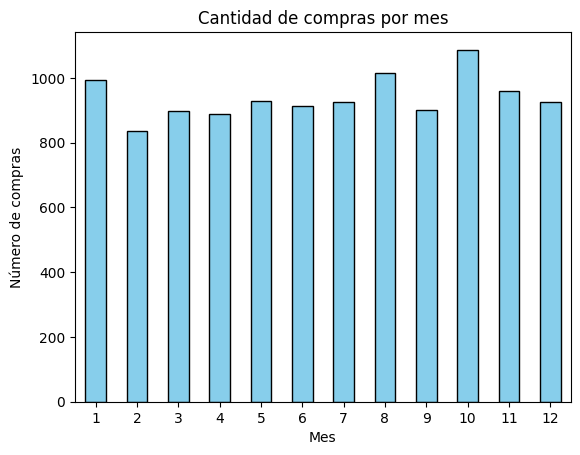

In [36]:
#15.  ¿Hay estacionalidad en las compras? ¿En qué meses se compra más?

compras_por_mes = df_dataset.groupby("Mes Compra").size()
compras_por_mes.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Mes")
plt.ylabel("Número de compras")
plt.title("Cantidad de compras por mes")
plt.xticks(rotation=0)
plt.show()



In [ ]:
#16.  ¿Cuál es la proporción entre compras de lavadoras y neveras?

lavadoras = df_dataset[df_dataset["Electrodoméstico"] == "Lavadora"].shape[0]
neveras = df_dataset[df_dataset["Electrodoméstico"] == "Nevera"].shape[0]

proporcion = lavadoras / neveras if neveras > 0 else 0
print(f"Proporción de compras de lavadoras a neveras: {proporcion:.2f}")

Proporción de compras de lavadoras a neveras: 1.00


In [37]:
#17.  ¿Cuántas compras hay de productos de cocina vs. climatización?

compras_cocina = df_dataset[df_dataset["Categoría"] == "Cocina"].shape[0]
compras_clima = df_dataset[df_dataset["Categoría"] == "Confort"].shape[0]

print(f"Compras de productos de cocina: {compras_cocina}")
print(f"Compras de productos de climatización: {compras_clima}")

Compras de productos de cocina: 5649
Compras de productos de climatización: 1093


In [38]:
#18.  ¿Cuántos productos se vendieron en total?

total_productos_vendidos = df_dataset["Cantidad"].sum()
print(f"Total de productos vendidos: {total_productos_vendidos}")

Total de productos vendidos: 33574.0


In [39]:
#19.  ¿Cuál es el promedio de productos por compra?

promedio_productos_por_compra = df_dataset["Cantidad"].mean()
print(f"Promedio de productos por compra: {promedio_productos_por_compra:.2f}")

Promedio de productos por compra: 2.98


In [40]:
#20.  ¿Qué porcentaje de las compras tiene más de una unidad?

compras_mas_de_una_unidad = (df_dataset["Cantidad"] > 1).sum()
porcentaje = (compras_mas_de_una_unidad / df_dataset.shape[0]) * 100

print(f"Porcentaje de compras con más de una unidad: {porcentaje:.2f}%")

Porcentaje de compras con más de una unidad: 79.50%


PREGUNTAS DE NEGOCIO

In [41]:
#1. ¿Qué productos debería promocionar la empresa en temporadas altas?

productos_temporada_alta = df_dataset.groupby(["Mes Compra", "Electrodoméstico"])["Cantidad"].sum().reset_index()
productos_top = productos_temporada_alta.sort_values(by=["Mes Compra", "Cantidad"], ascending=[True, False])

print("Productos más vendidos en temporada alta:")
print(productos_top.head(10))  # Muestra los 10 principales


Productos más vendidos en temporada alta:
   Mes Compra Electrodoméstico  Cantidad
4           1        Licuadora     365.0
8           1        Televisor     354.0
7           1          Plancha     315.0
5           1       Microondas     301.0
2           1  Horno eléctrico     300.0
9           1       Ventilador     293.0
0           1       Aspiradora     269.0
3           1         Lavadora     263.0
1           1         Cafetera     254.0
6           1           Nevera     243.0


In [42]:
#2. ¿Hay clientes frecuentes o con tickets altos a los que se podría fidelizar?

clientes_frecuentes = df_dataset.groupby(["Nombre", "Apellido"])["Valor Total"].sum().reset_index()
clientes_frecuentes = clientes_frecuentes.sort_values(by="Valor Total", ascending=False)

print("Clientes con tickets más altos:")
print(clientes_frecuentes.head(10) )

Clientes con tickets más altos:
           Nombre     Apellido  Valor Total
2931  Desconocido  Desconocido     30400000
6990       Marcia        Parra     18000000
678      Ambrosio         Prat     15000000
1467     Bautista   Villaverde     15000000
8571       Pastor    Cifuentes     14400000
727        Amparo      Artigas     13500000
2622     Cristian     Manrique     12900000
1341       Azahar     Figueroa     12000000
9069         Raúl          Pou     11400000
2775        Dafne      Álvarez     11000000


In [ ]:
#3. ¿Vale la pena mantener todos los productos en el portafolio?

ventas_por_producto = df_dataset.groupby("Electrodoméstico")["Cantidad"].sum()
productos_baja_demanda = ventas_por_producto[ventas_por_producto < 10]  # Ajustar umbral según negocio

print("Productos con baja demanda:")
print(productos_baja_demanda)

Productos con baja demanda:
Series([], Name: Cantidad, dtype: float64)


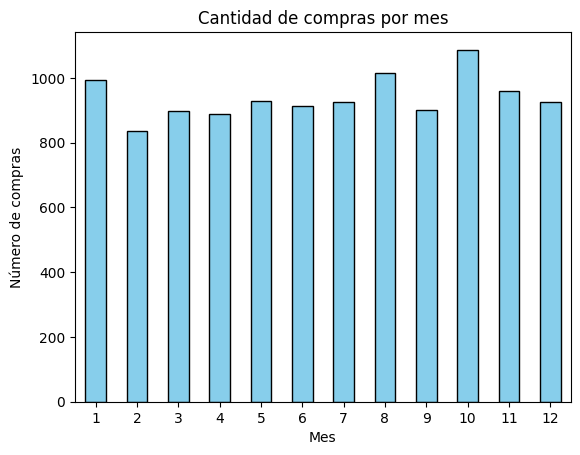

In [43]:
#4. ¿Debería la empresa reforzar su logística en ciertos meses?

compras_por_mes = df_dataset.groupby("Mes Compra").size()
compras_por_mes.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Mes")
plt.ylabel("Número de compras")
plt.title("Cantidad de compras por mes")
plt.xticks(rotation=0)
plt.show()


In [ ]:
#5. ¿Hay productos que parecen propensos a errores de registro?

# Identificar outliers en cantidad y valor unitario
outliers_cantidad = df_dataset[df_dataset["Cantidad"] > df_dataset["Cantidad"].quantile(0.99)]
outliers_valor = df_dataset[df_dataset["Valor Unitario"] > df_dataset["Valor Unitario"].quantile(0.99)]

print("Posibles errores en la cantidad registrada:")
print(outliers_cantidad)

print("\nPosibles errores en el valor unitario:")
print(outliers_valor)

Posibles errores en la cantidad registrada:
Empty DataFrame
Columns: [ID Compra, Nombre, Apellido, Electrodoméstico, Cantidad, Valor Unitario, Valor Total, Fecha Compra, Hora Compra, Año Compra, Mes Compra, Valor Medio por Unidad, Categoría]
Index: []

Posibles errores en el valor unitario:
Empty DataFrame
Columns: [ID Compra, Nombre, Apellido, Electrodoméstico, Cantidad, Valor Unitario, Valor Total, Fecha Compra, Hora Compra, Año Compra, Mes Compra, Valor Medio por Unidad, Categoría]
Index: []


<ipython-input-44-17c91dab1fb9>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df_dataset.groupby(pd.Grouper(key="Fecha Compra", freq="M"))["Cantidad"].sum()


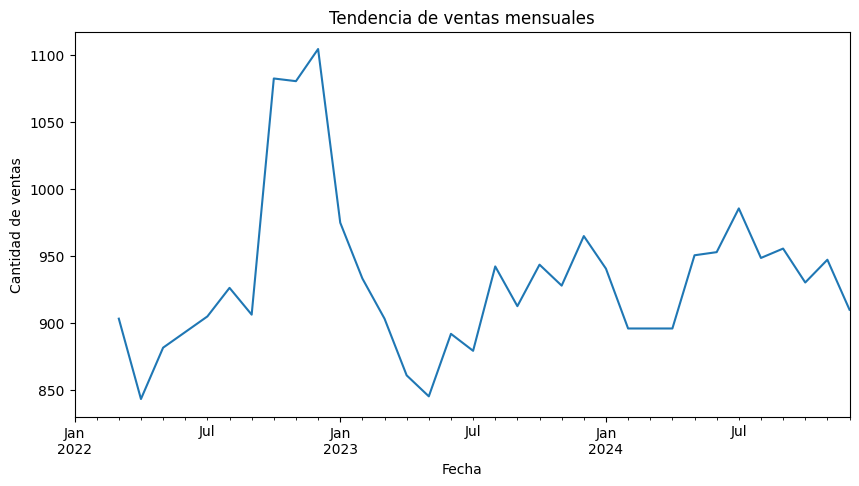

In [44]:
#6. ¿Se puede usar esta información para proyecciones de stock?

df_dataset["Fecha Compra"] = pd.to_datetime(df_dataset["Fecha Compra"])
ventas_mensuales = df_dataset.groupby(pd.Grouper(key="Fecha Compra", freq="M"))["Cantidad"].sum()

# Calcular promedio móvil de 3 meses
ventas_mensuales.rolling(window=3).mean().plot(title="Tendencia de ventas mensuales", figsize=(10,5))
plt.xlabel("Fecha")
plt.ylabel("Cantidad de ventas")
plt.show()

In [45]:
#7. ¿Qué productos podrían formar parte de combos?

from itertools import combinations
from collections import Counter

# Crear combinaciones de productos por compra
df_dataset["Cliente"] = df_dataset["Nombre"] + " " + df_dataset["Apellido"]
combos = df_dataset.groupby("Cliente")["Electrodoméstico"].apply(lambda x: list(combinations(x, 2)))

# Contar combinaciones más frecuentes
combos = [item for sublist in combos for item in sublist]
print("Productos que suelen comprarse juntos:")
print(Counter(combos).most_common(10))


Productos que suelen comprarse juntos:
[((nan, nan), 190), (('Lavadora', 'Lavadora'), 7), (('Horno eléctrico', 'Horno eléctrico'), 4), (('Licuadora', 'Licuadora'), 4), (('Aspiradora', 'Aspiradora'), 4), (('Horno eléctrico', 'Microondas'), 4), (('Plancha', 'Plancha'), 3), (('Microondas', 'Nevera'), 3), (('Cafetera', 'Cafetera'), 3), (('Microondas', 'Licuadora'), 3)]


In [46]:
#8. ¿Dónde hay oportunidades de ventas cruzadas?

clientes_por_producto = df_dataset.groupby("Electrodoméstico")["Cliente"].nunique()

print("Clientes únicos por producto:")
print(clientes_por_producto)

Clientes únicos por producto:
Electrodoméstico
Aspiradora         1119
Cafetera           1117
Horno eléctrico    1081
Lavadora           1125
Licuadora          1149
Microondas         1154
Nevera             1132
Plancha            1167
Televisor          1085
Ventilador         1091
Name: Cliente, dtype: int64


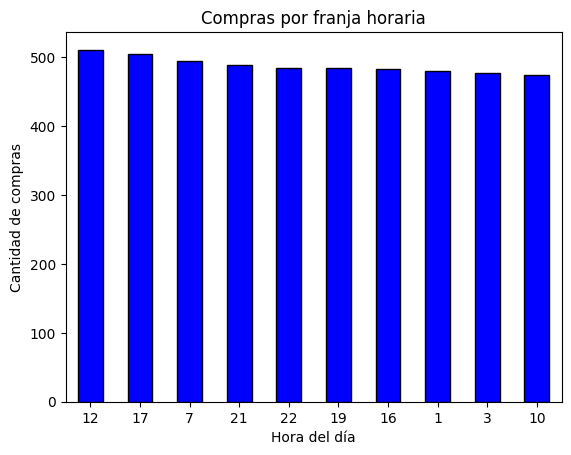

In [47]:
#9. ¿Qué franjas horarias podrían usarse para promociones digitales?

compras_por_hora = df_dataset.groupby("Hora Compra").size()
compras_por_hora  = compras_por_hora.sort_values(ascending=False)
compras_por_hora  = compras_por_hora.head(10)
compras_por_hora.plot(kind="bar", color="blue", edgecolor="black")

plt.xlabel("Hora del día")
plt.ylabel("Cantidad de compras")
plt.title("Compras por franja horaria")
plt.xticks(rotation=0)
plt.show()


In [ ]:
#10.  ¿Se podrían automatizar alertas para compras inusuales?

alerta_compras_usuales = df_dataset.groupby("Cliente")["Valor Total"].mean()
print(alerta_compras_usuales)




Cliente
Aarón Anguita      1200000.0
Aarón Aranda       7200000.0
Aarón Badía         750000.0
Aarón Cruz          200000.0
Aarón Cuadrado     3000000.0
                     ...    
Úrsula Peralta     3000000.0
Úrsula Salv        1200000.0
Úrsula Toro        7200000.0
Úrsula Valencia     450000.0
Úrsula Zamora       800000.0
Name: Valor Total, Length: 11157, dtype: float64
